In [1]:
import h3
import pandas as pd
import geopandas as gpd
import shapely
import pandas as pd
from shapely.geometry import MultiPolygon, Polygon, Point
import numpy as np
import contextily as ctx
import matplotlib.pyplot as plt
import geobr
import pyreadr
import matplotlib
%matplotlib inline

# Goal of this analysis
1. Load in social isolation (cell-phone mobility data), census demographic data, commuting survey data, and COVID-19 case data
2. Create exploratory visuals to understand distribution of regions within Sao Paulo
3. Spatial analysis to interpolate demographic, commuting, and COVID-19 data to the isolation hexagons for transferrable analysis

In [2]:
data_path = '/Users/shivyucel/Documents/SDS_2021.nosync/SDS_2020-2021/SDS_Thesis/Data/'

### Load in Isolation Data
* Each isolation hexagon represents the proportion of individuals who live in a hexagon, who leave in a given day
    * The data is from a Brazilian mobile phone analytics company

In [3]:
iso= pd.read_csv(data_path + 'data-raw/isolation/isolation_sp_h3_Mar-Sep2020.csv')

In [4]:
iso['coords'] = [Polygon(h3.h3_to_geo_boundary(x, True)) for x in iso['h3']]

In [ ]:
iso = gpd.GeoDataFrame(iso, geometry='coords', crs= {"init": "epsg:4326"})

In [5]:
iso.to_file('Data/data-raw/cleaned/isolation.shp')

In [9]:
iso = gpd.read_file(data_path + 'data-raw/cleaned/isolation.shp')

### Explore 

In [5]:
#convert dates to datetime
iso['dt'] = pd.to_datetime(iso['dt'])

In [6]:
#get earliest and latest day
print(f"Earliest Date of Isolation Data: {iso['dt'].min()}")
print(f"Latest Date of Isolation Data: {iso['dt'].max()}")

Earliest Date of Isolation Data: 2020-03-01 00:00:00
Latest Date of Isolation Data: 2020-09-27 00:00:00


### Plot of Isolation Hexagons

In [10]:
iso_plot = iso.drop_duplicates('h3')

In [12]:
iso_plot

,h3,dt,city,isolated,coords
0,88a8103a51fffff,2020-03-19,Carapicuíba,0.343290,POLYGON ((-46.82036327241283 -23.5442714299807...
1,88a8102955fffff,2020-03-19,Franco da Rocha,0.326096,POLYGON ((-46.71924939626565 -23.3322829873789...
2,88a81045abfffff,2020-03-19,Suzano,0.363296,"POLYGON ((-46.29302833995862 -23.516182901018,..."
3,88a8100327fffff,2020-03-19,São Bernardo do Campo,0.419984,POLYGON ((-46.56605594108055 -23.7417199612210...
4,88a81000edfffff,2020-03-19,São Paulo,0.356494,POLYGON ((-46.64711846709331 -23.6874026928489...
...,...,...,...,...,...
367925,88a8100b4dfffff,2020-08-09,Ribeirão Pires,0.501047,POLYGON ((-46.43368848567587 -23.7186328871632...
375964,88a8101643fffff,2020-07-04,Embu-Guaçu,0.430278,POLYGON ((-46.8141674378228 -23.84950258999782...
426484,88a8101739fffff,2020-07-12,São Paulo,0.599942,POLYGON ((-46.74573826459297 -23.8129704467842...
458572,88a810a89bfffff,2020-08-15,Vargem Grande Paulista,0.300243,POLYGON ((-47.00381830710847 -23.6443629773948...


In [13]:
iso_plot = gpd.GeoDataFrame(iso_plot, geometry='coords', crs= {"init": "epsg:4326"})

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [14]:
degree_income = pd.read_csv('/Users/shivyucel/Documents/SDS_2021.nosync/SDS_2020-2021/SDS_Thesis/Thesis_Code/SIR_Model_Paper/weighted_degree_income.csv')

In [15]:
merged = iso_plot.merge(degree_income, left_on='h3', right_on='hexids', how='right')

In [16]:
merged

,h3_x,dt,city,isolated,coords,Unnamed: 0,TARGET,FLUX,hexids,degree_quart,h3_y,weighted_income_avg_head,income_quart,timesaved
0,88a8103a51fffff,2020-03-19,Carapicuíba,0.343290,"POLYGON ((-46.82036 -23.54427, -46.81620 -23.5...",0,0.0,633,88a8103a51fffff,3,88a8103a51fffff,1165.157928,2,6.821282
1,88a8102955fffff,2020-03-19,Franco da Rocha,0.326096,"POLYGON ((-46.71925 -23.33228, -46.71509 -23.3...",1,1.0,111,88a8102955fffff,1,88a8102955fffff,1680.573079,3,8.244891
2,88a81045abfffff,2020-03-19,Suzano,0.363296,"POLYGON ((-46.29303 -23.51618, -46.28886 -23.5...",2,2.0,522,88a81045abfffff,2,88a81045abfffff,981.735705,1,6.931241
3,88a8100327fffff,2020-03-19,São Bernardo do Campo,0.419984,"POLYGON ((-46.56606 -23.74172, -46.56189 -23.7...",3,3.0,458,88a8100327fffff,2,88a8100327fffff,1654.233812,3,7.135993
4,88a81000edfffff,2020-03-19,São Paulo,0.356494,"POLYGON ((-46.64712 -23.68740, -46.64295 -23.6...",4,4.0,626,88a81000edfffff,3,88a81000edfffff,993.166598,1,6.885741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2594,88a8100507fffff,2020-04-22,São Paulo,0.349310,"POLYGON ((-46.71237 -23.61689, -46.70820 -23.6...",2594,2833.0,972,88a8100507fffff,4,88a8100507fffff,14638.662882,4,6.104649
2595,88a8107aa7fffff,2020-03-08,Arujá,0.299487,"POLYGON ((-46.36368 -23.41773, -46.35951 -23.4...",2595,2835.0,288,88a8107aa7fffff,1,88a8107aa7fffff,1349.024195,2,7.674416
2596,88a8101051fffff,2020-05-03,São Paulo,0.649827,"POLYGON ((-46.65876 -23.87366, -46.65459 -23.8...",2596,2842.0,204,88a8101051fffff,1,88a8101051fffff,891.473342,1,7.852626
2597,88a8100297fffff,2020-03-14,São Paulo,0.094991,"POLYGON ((-46.71491 -23.70263, -46.71075 -23.6...",2597,2844.0,478,88a8100297fffff,2,88a8100297fffff,3803.473258,4,7.382454


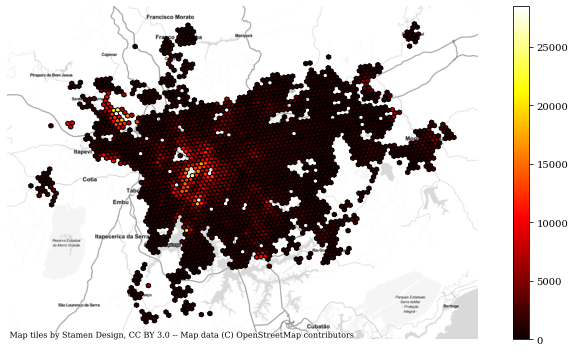

In [17]:
merged = merged.to_crs(epsg=3857)

import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Serif"

fig, ax = plt.subplots(figsize=(10, 5))
merged.plot(alpha=1, edgecolor='k', ax=ax, column='weighted_income_avg_head', legend=True, cmap='hot')
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)
ax.set_axis_off()

plt.tight_layout()
#plt.title("Social Isolation Hexagon Regions", fontsize=27, pad=20)
#plt.show()

### Sao Paulo Census Tract Shapefile

Get tract data from geobr package and save as shp

In [48]:
tracts = geobr.read_census_tract(code_tract="SP", year=2010, simplified=False)
tracts.to_file(data_path + 'data-raw/cleaned/census_shp.shp')

<ipython-input-48-7e00167f4285>:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  tracts.to_file(data_path + 'data-raw/cleaned/census_shp.shp')


In [40]:
#read in tract data
tracts = gpd.read_file(data_path + '/data-raw/cleaned/census_shp.shp')


In [42]:
iso_plot = iso_plot.to_crs(epsg=4674)

In [43]:
merged = gpd.sjoin(tracts, iso_plot, how='inner', op='intersects')

In [44]:
# Number of Census Tract Zones That Intersect with Mobility Index
len(merged['code_tract'].unique())

28820

# Interpolation

## Method:  Demographic Info (Race, Income, etc)

To compute demographic information for each hexagon from the census tract data, the first step is to determine the proportions of demographic characteristics in the census zone, by dividing by the total population (ex. % black). Subsequently, the geographic proportion of each h3 hexagon covered by each census region is determined. The following plot represents an example of an h3 region with many overlapping census regions:

In [47]:
census_data = pd.read_csv(data_path + 'data-raw/census_tracts/census_tracts2010_sp.csv')

In [48]:
census_data.rename(columns={'pop_branca': 'pop_white', 'pop_preta': 'pop_black', 
                           'pop_amarela': 'pop_yellow', 'pop_parda': 'pop_brown', 
                           'pop_indigena': 'pop_indigenous'}, inplace=True)

### Race Information

In [49]:
#create columns of demographic proportion relative to total population in each census tract
for col in census_data.columns:
    if col[:3] == 'pop':
        census_data[f'propor_{col[4:]}'] = census_data[col]/census_data['pop_total']
        

In [50]:
#set south american coordinate system
iso_plot = iso_plot.to_crs(epsg=4674)
tract_plot = tract_plot.to_crs(epsg=4674)

In [51]:
overlay_iso_tract = gpd.overlay(iso_plot, tract_plot, how='intersection')

In [52]:
#get each intersection area between isolation hexagons and census tracts
overlay_iso_tract = overlay_iso_tract.merge(iso_plot[['h3', 'geometry']], left_on='h3_1', right_on='h3')

In [53]:
#get proportion of isolation hexagon in each census tract-iso hexagon intersection area
overlay_iso_tract['overlap_proportion'] = [x.area/y.area for x, y in zip(overlay_iso_tract['geometry_x'], overlay_iso_tract['geometry_y'])]

In [54]:
#get area of isolation hexagon in each census tract-iso hexagon intersection area
overlay_iso_tract['overlap_area'] = [x.area for x in overlay_iso_tract['geometry_x']]

In [55]:
#create list of demographic proportion and code tract columns
propor_list = [col for col in census_data.columns if 'propor' in col] + ['code_tract']

In [56]:
#make code_tract as int for comparability
overlay_iso_tract.code_tract = overlay_iso_tract.code_tract.astype(int)

In [57]:
#merge intersection areas with the proportions of demographic information from each census group
overlay_w_propor = overlay_iso_tract.merge(census_data[propor_list], how='left', on='code_tract' )

In [58]:
#get columns with proportions
propor_cols = [col for col in overlay_w_propor.columns if col[:6] == 'propor']

In [59]:
#create weighted proportions for each h3 area's demographic info based on proportion of total area in given census tract
for col in propor_cols:
    overlay_w_propor[f'weighted_{col}'] = overlay_w_propor[col] * overlay_w_propor['overlap_proportion']

In [60]:
weighted_cols = [col for col in overlay_w_propor.columns if col[:8] == 'weighted']

In [61]:
#sum the weighted proportions for each h3 group 
weighted_h3 = overlay_w_propor.groupby('h3')[weighted_cols].sum().iloc[:, 1:]

In [ ]:
weighted_h3.to_csv(data_path + '/estimates/h3_demographic.csv')

## Income

In [ ]:
#create columns of income proportion relative to total population in each census tract
income_cols = []
for col in census_data.columns:
    if col[:6] == 'income':
        income_cols.append(col)
        

In [ ]:
income_cols += ['code_tract']

In [ ]:
#set south american coordinate system
iso_plot = iso_plot.to_crs(epsg=4674)

In [ ]:
overlay_iso_tract = gpd.overlay(iso_plot, tracts, how='intersection')

In [ ]:
#get each intersection area between isolation hexagons and census tracts
overlay_iso_tract = overlay_iso_tract.merge(iso_plot[['h3', 'geometry']], on='h3')

In [ ]:
#get proportion of isolation hexagon in each census tract-iso hexagon intersection area
overlay_iso_tract['overlap_proportion'] = [x.area/y.area for x, y in zip(overlay_iso_tract['geometry_x'], overlay_iso_tract['geometry_y'])]

In [ ]:
#make code_tract as int for comparability
overlay_iso_tract.code_tract = overlay_iso_tract.code_tract.astype(int)

In [ ]:
income_cols

['income_avg_head',
 'income_total',
 'income_0',
 'income_1',
 'income_2',
 'code_tract']

In [ ]:
#merge intersection areas with the proportions of demographic information from each census group
overlay_w_propor = overlay_iso_tract.merge(census_data[income_cols], how='left', on='code_tract' )

In [ ]:
#create weighted proportions for each h3 area's demographic info based on proportion of total area in given census tract
for col in income_cols:
    overlay_w_propor[f'weighted_{col}'] = overlay_w_propor[col] * overlay_w_propor['overlap_proportion']

In [ ]:
#create columns of demographic proportion relative to total population in each census tract
income_cols = []
for col in overlay_w_propor.columns:
    if col[:8] == 'weighted':
        income_cols.append(col)
        

In [ ]:
income_cols= income_cols[:-1]

In [ ]:
income_cols

['weighted_income_avg_head',
 'weighted_income_total',
 'weighted_income_0',
 'weighted_income_1',
 'weighted_income_2',
 'weighted_code_tract']

In [ ]:
overlay_w_propor = overlay_w_propor.iloc[:, :-1]

In [ ]:
h3_income = overlay_w_propor.groupby('h3')[income_cols].sum()

In [ ]:
h3_income

,weighted_income_avg_head,weighted_income_total,weighted_income_0,weighted_income_1,weighted_income_2
h3,,,,,
88a8100001fffff,1143.143445,219045.011075,7.212334,51.759904,148.251059
88a8100003fffff,928.374062,266227.034608,5.355643,76.529913,189.355202
88a8100005fffff,1004.591452,387886.510746,11.044067,94.836875,326.202259
88a8100007fffff,1160.208616,423527.487669,8.900752,90.437966,249.151094
88a8100009fffff,2069.354689,702143.748680,3.386166,68.824963,193.317424
...,...,...,...,...,...
88a812b4d7fffff,1115.374845,446098.731205,13.022348,117.310452,317.582862
88a812b4d9fffff,1486.043800,210526.126063,9.380995,45.194918,84.349785
88a812b4ddfffff,1513.275799,539765.072796,12.047683,89.093817,274.790064


In [ ]:
h3_income.to_csv(data_path + 'estimates/h3_income.csv')

In [ ]:
import h3
import pandas as pd
import geopandas as gpd
import shapely
import pandas as pd
from shapely.geometry import MultiPolygon, Polygon, Point
import numpy as np
import contextily as ctx
import matplotlib.pyplot as plt
import geobr
import pyreadr
import matplotlib
%matplotlib inline

## Rate of Population Growth in Sao Paulo

In [ ]:
commute = pd.read_csv('Data/data-raw/travel_survey/travel_matrix_spo2017.csv')

In [ ]:
pop_SP_2010 = 11253503
pop_SP_2019 = 12252023

In [ ]:
delta_t = 9
yearly_rate = (pop_SP_2019/pop_SP_2010)**(1.0/delta_t)

print('Yearly population growth rate in SP:\n{:.6f} or {:2.4f}%'.format(yearly_rate, (yearly_rate-1)*100 ))

Yearly population growth rate in SP:
1.009490 or 0.9490%


In [ ]:
pop_SP_2020 = round(pop_SP_2010*(yearly_rate**10))

print('Estimated total SP population in 2020:',pop_SP_2020)

Estimated total SP population in 2020: 12368301


### Get Commuting Flow Data

In [ ]:
commute = pd.read_csv('Data/data-raw/travel_survey/travel_matrix_spo2017.csv')
labels= pd.read_excel('Data/zone_labels.xlsx', skiprows=3, header = 1)

In [ ]:
#clean and merge dataframes
labels = labels[2:]
labels['Zona'] = labels[labels['Zona'] != 'nan']
labels['Zona'] = labels[labels['Zona'] != 'N°']
labels['Zona'] = labels[labels['Zona'] != 'Zona']
labels['Zona'] = labels['Zona'].astype(float)
labels.rename(columns={'Unnamed: 1': 'zona_nome', 'Unnamed: 3': 'municipio_nome', 'Unnamed: 5': 'distrito_nome'}, inplace=True)
labels.drop('Unnamed: 7', axis=1, inplace=True)
#commute = commute.merge(labels, left_on='ZONA_O', right_on='Zona')


# remove missing values
commute = commute[~commute['ZONA_O'].isnull()]
commute = commute[~commute['ZONA_D'].isnull()]
commute = commute[commute['ZONA_O'] != 'nan']
commute = commute[commute['ZONA_D'] != 'nan']
commute = commute[~commute['mean_time'].isnull()]

In [ ]:
commute_orig = commute_orig[['ZONA_O', 'pop_orig']]

In [ ]:
commute_orig.dropna(inplace=True)

In [ ]:
commute_orig['ZONA_O'] = commute_orig['ZONA_O'].astype(int)

In [ ]:
commute_orig.drop_duplicates('ZONA_O', inplace=True)

### Estimate 2020 Population for Commuting Zones and Estimate H3 Population Based on Degree of Overlap

In [ ]:
commute_orig['2020_pop'] = commute_orig['pop_orig'] * yearly_rate**3

In [ ]:
import fiona
shape = fiona.open("Data/data-raw/travel_survey/Zonas_2017_region.shp")
# Build the GeoDataFrame from Fiona Collection
commute_zones = gpd.GeoDataFrame.from_features([feature for feature in shape], crs = 29193)
# Get the order of the fields in the Fiona Collection; add geometry to the end
columns = list(shape.meta["schema"]["properties"]) + ["geometry"]
# Re-order columns in the correct order
commute_zones = commute_zones[columns]

In [ ]:
commute_zones.to_crs(crs=4674, inplace=True)
iso_plot.to_crs(crs=4674, inplace=True)

In [ ]:
#Get area of commuting zones
commute_zones['zona_area'] = [x.area for x in commute_zones['geometry']]

In [ ]:
#get intersections of isolation zones and commuting zones
iso_commute = gpd.overlay(iso_plot, commute_zones )

In [ ]:
#get area of overlapping regions
iso_commute['overlap_area'] = [x.area for x in iso_commute['geometry']]

In [ ]:

iso_commute = iso_commute[['h3', 'NumeroZona', 'overlap_area', 'zona_area']]

In [ ]:
iso_commute = iso_commute.merge(commute_orig, left_on='NumeroZona', right_on='ZONA_O')

In [ ]:
#get proportion of total commuting area covered by a given hexagon


iso_commute['overlap_propor'] = iso_commute['overlap_area'] / iso_commute['zona_area']

In [ ]:
iso_commute['2020_pop_h3'] = iso_commute['overlap_propor'] * iso_commute['2020_pop'] 

In [ ]:
iso_commute = iso_commute[['h3', '2020_pop_h3']]

In [ ]:
iso_commute.to_csv('Data/estimates/h3_pop.csv')

In [ ]:
iso_commute.groupby('h3').sum().to_csv('Data/estimates/h3_pop.csv')

In [ ]:
pop = pd.read_csv(data_path + 'h3/population/h3_pop.csv')


In [ ]:
iso_commute['2020_pop_h3'].sum()

12533637.79961404

### Interpolate Commuting Flow Information to Social Isolation Hexagon Level

In [15]:
commute = pd.read_csv(data_path + '/data-raw/travel_survey/travel_matrix_spo2017.csv')
labels= pd.read_excel(data_path + '/zone_labels.xlsx', skiprows=3, header = 1)

In [16]:
#clean and merge dataframes
labels = labels[2:]
labels['Zona'] = labels[labels['Zona'] != 'nan']
labels['Zona'] = labels[labels['Zona'] != 'N°']
labels['Zona'] = labels[labels['Zona'] != 'Zona']
labels['Zona'] = labels['Zona'].astype(float)
labels.rename(columns={'Unnamed: 1': 'zona_nome', 'Unnamed: 3': 'municipio_nome', 'Unnamed: 5': 'distrito_nome'}, inplace=True)
labels.drop('Unnamed: 7', axis=1, inplace=True)
#commute = commute.merge(labels, left_on='ZONA_O', right_on='Zona')


# remove missing values
commute = commute[~commute['ZONA_O'].isnull()]
commute = commute[~commute['ZONA_D'].isnull()]
commute = commute[commute['ZONA_O'] != 'nan']
commute = commute[commute['ZONA_D'] != 'nan']
commute = commute[~commute['mean_time'].isnull()]

In [17]:
import fiona
shape = fiona.open(data_path + "/data-raw/travel_survey/Zonas_2017_region.shp")

In [18]:
shape

<open Collection '/Users/shivyucel/Documents/Github.nosync/SDS_2020-2021/SDS_Thesis/Data//data-raw/travel_survey/Zonas_2017_region.shp:Zonas_2017_region', mode 'r' at 0x177448fa0>

In [19]:
# Build the GeoDataFrame from Fiona Collection
commute_zones = gpd.GeoDataFrame.from_features([feature for feature in shape], crs = 29193)
# Get the order of the fields in the Fiona Collection; add geometry to the end
columns = list(shape.meta["schema"]["properties"]) + ["geometry"]
# Re-order columns in the correct order
commute_zones = commute_zones[columns]

In [21]:
commute_zones.to_crs('epsg:3857', inplace=True)
#iso_plot.to_crs('epsg:3857', inplace=True)

In [197]:
len(commute_zones)

517

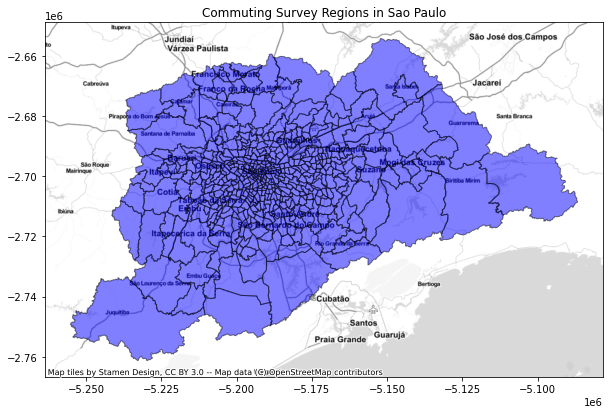

In [15]:
fig, ax = plt.subplots(figsize=(10, 10))
commute_zones.plot(alpha=0.5, color='blue', ax=ax, edgecolor='k')
#iso_plot.plot(alpha=0.1, color='red', ax=ax, edgecolor='k')
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)
plt.title("Commuting Survey Regions in Sao Paulo")
plt.savefig(data_path + 'images/commuting_regions.png', dpi=300)

In [314]:
commute_zones.to_crs(crs=4674, inplace=True)
iso_plot.to_crs(crs=4674, inplace=True)

In [315]:
commute_zones.to_file('Data/data-raw/travel_survey/commute_shapes.shp')

In [343]:
commute_zones = gpd.read_file('Data/data-raw/travel_survey/Zonas_2017_region.shp')

In [344]:
#Get area of commuting zones
commute_zones['zona_area'] = [x.area for x in commute_zones['geometry']]

In [355]:
#get intersections of isolation zones and commuting zones
iso_commute = gpd.overlay(iso_plot, commute_zones )

In [356]:
#get area of overlapping regions
iso_commute['overlap_area'] = [x.area for x in iso_commute['geometry']]

In [358]:

iso_commute = iso_commute[['h3', 'FID', 'overlap_area', 'zona_area']]

In [360]:
#get proportion of total commuting area covered by a given hexagon
iso_commute['propor_overlap'] = iso_commute['overlap_area'] / iso_commute['zona_area']

<ipython-input-360-90172f017599>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iso_commute['propor_overlap'] = iso_commute['overlap_area'] / iso_commute['zona_area']


In [ ]:
#create dataframe to hold h3-commuting zone proportions
overlap_extent_matrix = pd.DataFrame(index=iso_plot['h3'], columns=commute_zones['NumeroZona'])

In [370]:
#fill in dataframe with proportions
for index, row in iso_commute.iterrows():
    overlap_extent_matrix.loc[row['h3'], row['FID']] = row['propor_overlap']

In [378]:
overlap_extent_matrix.replace(to_replace=np.nan, value=0, inplace=True)

In [398]:
overlap_extent_matrix = overlap_extent_matrix.transpose()

In [400]:
overlap_extent_matrix.to_csv('Data/data-raw/travel_survey/overlap_extent.csv')

In [669]:
#get commuting origins as strings
commute['ZONA_O'] = commute['ZONA_O'].astype(str)

In [670]:
#get overlap extent index as string
overlap_extent_matrix.index = overlap_extent_matrix.index.astype(str)

In [671]:
#create column to hold original commuting origin zone
commute['ZONA_O_orig'] = commute['ZONA_O']

In [675]:
overlap_extent_matrix.set_index('NumeroZona', inplace=True)

In [677]:
#replace origin commuting zone with all h3 zones which cover some proportion of the origin commuting zone
for zone in commute['ZONA_O'].unique():
    val = [col for col in overlap_extent_matrix.columns if overlap_extent_matrix.loc[zone, col] != 0]
    commute['ZONA_O'].replace(to_replace=zone, value= str(val), inplace=True)    

In [678]:
commute['ZONA_O'] = [ast.literal_eval(x) for x in commute['ZONA_O']]

In [679]:
commute = commute.explode('ZONA_O')

In [680]:
commute.reset_index(inplace=True, drop=True)

In [682]:
overlap_extent_matrix.reset_index(inplace=True)

In [683]:
pivoted = overlap_extent_matrix.melt(id_vars='NumeroZona')

In [685]:
#merge proportion of origin commuting zone covered by each overlapping h3
commute = commute.merge(pivoted, left_on=['ZONA_O_orig', 'ZONA_O'], right_on=['NumeroZona', 'h3'])

In [694]:
commute.rename(columns={'value': 'O_propor'}, inplace=True)

In [695]:
#multiply count of people from two commuting zones by the proportion of the origin commuting zone covered by the h3 
#gives estimate h3 --> commuting zone
commute['weighted_count'] = commute['O_propor'] * commute['count']

In [697]:
commute['ZONA_D'] = commute['ZONA_D'].astype(str)

In [621]:
overlap_extent_matrix.index = overlap_extent_matrix.index.astype(str)

In [698]:
commute['ZONA_D_orig'] = commute['ZONA_D']

In [700]:
overlap_extent_matrix.set_index('NumeroZona', inplace=True)

In [701]:
#get destination h3 zones which cover the commuting zone destinations
for zone in commute['ZONA_D'].unique():
    val = [col for col in overlap_extent_matrix.columns if overlap_extent_matrix.loc[zone, col] != 0]
    commute['ZONA_D'].replace(to_replace=zone, value= str(val), inplace=True)    

In [702]:
commute['ZONA_D'] = [ast.literal_eval(x) for x in commute['ZONA_D']]

In [703]:
commute = commute.explode('ZONA_D')

In [705]:
commute.reset_index(inplace=True, drop=True)

In [709]:
#get proportions of commuting destination zones covered by the intersecting h3 zones
commute = commute.merge(pivoted, left_on=['ZONA_D_orig', 'ZONA_D'], right_on=['NumeroZona', 'h3'])

In [710]:
#multiply 'h3' origin --> 'commuting zone' destination count by the proportion of destination commuting zone covered by h3
# get h3 --> h3 estimate
commute['final_count'] = commute['weighted_count'] * commute['value']

In [715]:
commute.to_csv('Data/data-raw/travel_survey/h3_commute.csv')